# Mall Customer Segmentation Data

You can find the description of the data [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

We are going to use three clustering methods: 

1.K-Mens <br>
2.Hierarchical <br>
3.DBSCAN

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

In [4]:
Income_df = pd.read_csv("03-Annual Income .csv")

In [6]:
import pandas_profiling

In [7]:
Income_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# K-Means

In [10]:
import pandas as pd
Income_df = pd.read_csv("03-Annual Income .csv")
Income_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
Income_df['Gender'] = Income_df['Gender'].map({'Male': 1, 'Female': 0})
Income_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [45]:
Income_df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000,1.850000
std,57.879185,0.497633,13.969007,26.264721,25.823522,1.294558
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,0.000000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000,3.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000,4.000000


In [20]:
from sklearn.preprocessing import StandardScaler
X = Income_df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [38]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [39]:
Income_df["Clus_km"] = labels
Income_df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,1,19,15,39,0
1,2,1,21,15,81,3
2,3,0,20,16,6,0
3,4,0,23,16,77,3
4,5,0,31,17,40,0


In [40]:
Income_df.groupby('Clus_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,23.000000,0.391304,45.217391,26.304348,20.913043
1,86.265823,0.417722,43.088608,55.291139,49.569620
2,162.000000,0.461538,32.692308,86.538462,82.128205
3,24.000000,0.391304,25.521739,26.304348,78.565217
4,163.500000,0.527778,40.666667,87.750000,17.583333


In [41]:
 X[:, 2]

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

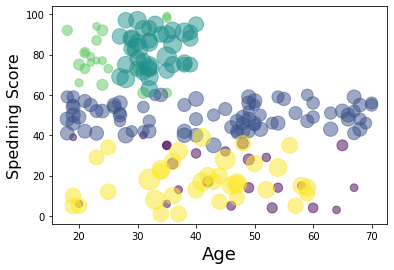

In [42]:
area = np.pi * ( X[:, 2])
plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spedning Score', fontsize=16)

plt.show()


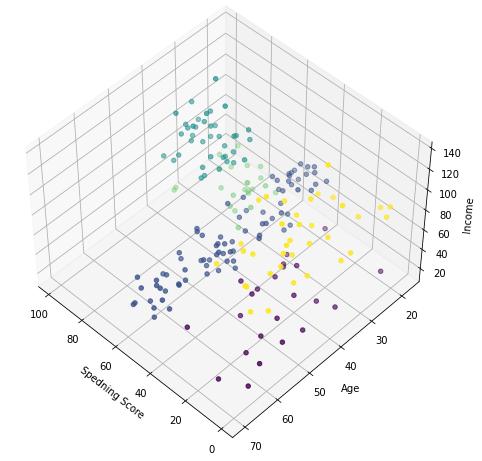

In [44]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Spedning Score')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 3], X[:, 1], X[:, 2], c= labels.astype(np.float))

In [64]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
import pylab
%matplotlib inline

# Hierarchical Clustering

In [59]:
Income_df = pd.read_csv("03-Annual Income .csv")
Income_df['Gender'] = Income_df['Gender'].map({'Male': 1, 'Female': 0})
Income_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [60]:
featureset = Income_df.copy().drop('CustomerID', axis = 1)
featureset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [61]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

In [54]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [68]:
import scipy.cluster.hierarchy
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')
pdf = pd.read_csv("03-Annual Income .csv")

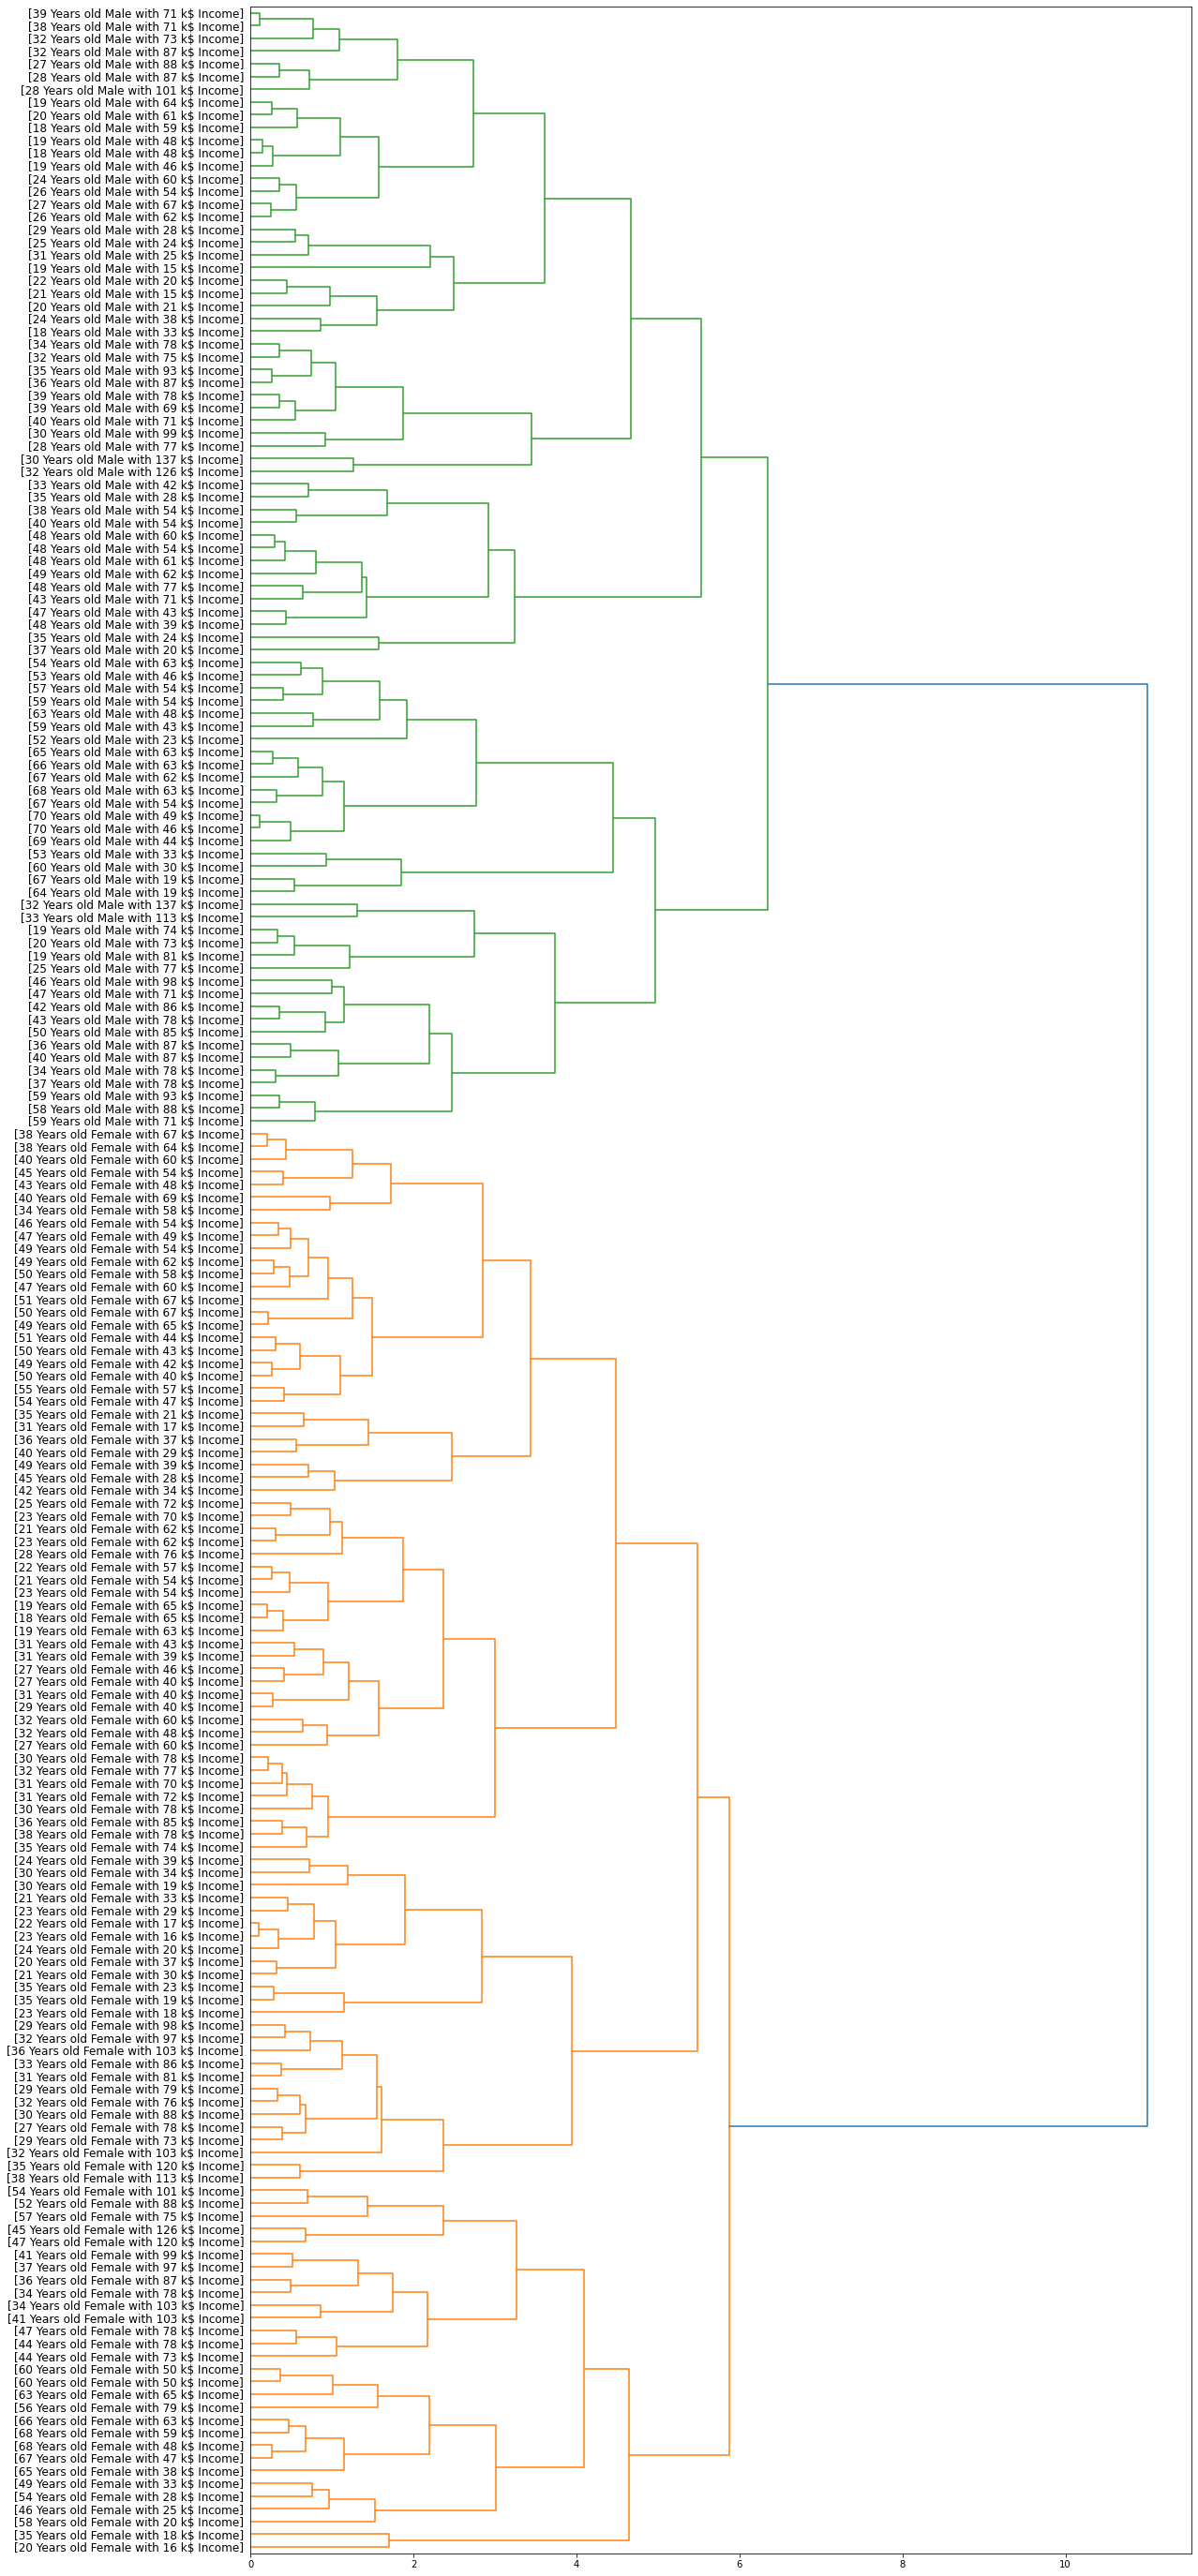

In [81]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s %s %s %s]' % ( pdf['Age'][id] ,"Years old" , pdf['Gender'][id], "with" , pdf['Annual Income (k$)'][id], "k$ Income")
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [83]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(dist_matrix)
agglom.labels_

array([1, 1, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0, 3, 0, 4, 1, 0, 1, 2, 0, 4, 1,
       3, 1, 3, 1, 0, 4, 0, 0, 2, 0, 2, 1, 3, 0, 0, 0, 0, 0, 3, 1, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 4, 0, 2, 0, 2, 2, 1, 3, 0, 2, 1,
       0, 3, 1, 0, 2, 0, 3, 3, 2, 1, 0, 4, 0, 0, 2, 4, 2, 0, 0, 4, 0, 0,
       0, 0, 3, 1, 4, 0, 0, 1, 0, 0, 4, 1, 0, 0, 2, 1, 4, 0, 3, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 1, 2, 1, 2, 1,
       0, 0, 2, 0, 3, 1, 2, 0, 3, 1, 0, 0, 2, 1, 4, 0, 3, 1, 2, 1, 3, 0,
       3, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 3, 1, 2, 1, 2, 1, 3, 0,
       2, 1, 2, 1, 3, 0, 2, 0, 3, 1, 3, 1, 3, 0, 3, 0, 2, 0, 3, 0, 3, 1,
       2, 1])

In [84]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Spending Score (1-100)')

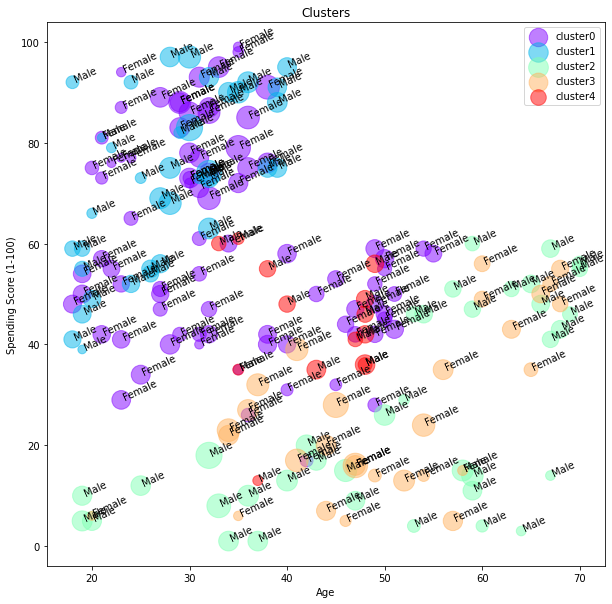

In [90]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(10,10))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset['Spending Score (1-100)'][i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Age, subset['Spending Score (1-100)'], s= subset['Annual Income (k$)']*5, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

In [93]:
pdf.groupby(['cluster_'])['cluster_'].count()

cluster_
0    83
1    37
2    37
3    29
4    14
Name: cluster_, dtype: int64

In [97]:
pdf['Gender'] = pdf['Gender'].map({'Male': 1, 'Female': 0})

In [98]:
agg_Incomes = pdf.groupby(['cluster_'])['Gender','Age','Annual Income (k$)','Spending Score (1-100)'].mean()
agg_Incomes

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster_,,,,
0,0.0,33.963855,56.518072,60.228916
1,1.0,27.675676,63.675676,72.729730
2,1.0,50.864865,65.702703,26.081081
3,0.0,49.931034,67.068966,26.620690
4,1.0,42.642857,49.214286,43.785714


# DBSCAN

In [100]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [101]:
Income_df = pd.read_csv("03-Annual Income .csv")
Income_df['Gender'] = Income_df['Gender'].map({'Male': 1, 'Female': 0})
Income_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [105]:
from sklearn.preprocessing import StandardScaler
X = Income_df.values[:,1:]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
X

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [143]:
epsilon = 0.8
minimumSamples = 3
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([-1,  0, -1,  1,  1,  1, -1,  1,  2,  1,  2, -1,  1,  1, -1,  0,  1,
        0,  0, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  2,  1,  2,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        3,  0,  0,  1,  3,  0,  1,  1,  0,  0,  0,  1,  3,  0,  0,  0,  3,
        1,  3,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  3,  0,
        0,  0,  0,  0,  3,  1,  0,  0,  0,  0,  3,  1,  0,  1,  3,  0,  3,
        0,  3,  1,  3,  1, -1,  1,  3,  1,  3, -1, -1, -1])

In [144]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask[0:10]

array([False,  True, False,  True, False,  True, False,  True,  True,
        True])

In [145]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

4

In [146]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3}